<a href="https://colab.research.google.com/github/FredMiraglia/projeto_analise_dados/blob/main/Analise_de_fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
pd.options.plotting.backend = 'plotly'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/dados.csv', parse_dates=['Data_Contratacao'])
df.head()

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
0,322068935715,43,M,5800.00,SP,23.00,200,2022-08-01,193,80000.00,92000.00,15,9,1,0,DIVORCIADO,Nenhum,N,0.00,0,NaN,91759.97,7717.08,Nao
1,322068936715,22,M,2000.00,MG,20.00,100,2022-08-01,89,50000.00,57500.00,10,10,0,0,SOLTEIRO(A),NaN,N,0.00,4,103.00,53981.18,6756.59,Nao
2,322068938715,35,M,4000.00,BA,18.00,100,2022-08-01,85,100000.00,115000.00,15,5,1,0,CASADO (A),NaN,N,0.00,0,NaN,101150.02,17929.06,Nao
3,322068939715,20,M,1800.00,MG,20.00,100,2022-08-01,89,30000.00,34500.00,1,1,0,0,SOLTEIRO(A),NaN,N,0.00,13,376.00,36208.10,369.10,Sim
4,322068940715,53,M,2800.00,MG,20.00,100,2022-08-01,87,60000.00,69000.00,16,16,0,0,CASADO (A),NaN,N,0.00,0,NaN,60984.00,11845.24,Nao


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Contrato                          9517 non-null   int64         
 1   Idade                             9517 non-null   int64         
 2   Sexo                              9517 non-null   object        
 3   Valor_Renda                       9517 non-null   float64       
 4   UF_Cliente                        9517 non-null   object        
 5   Perc_Juros                        9517 non-null   float64       
 6   Prazo_Emprestimo                  9517 non-null   int64         
 7   Data_Contratacao                  9517 non-null   datetime64[ns]
 8   Prazo_Restante                    9517 non-null   int64         
 9   VL_Emprestimo                     9517 non-null   float64       
 10  VL_Emprestimo_ComJuros            9517 non-null 

In [8]:
df.describe()

,Contrato,Idade,Valor_Renda,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago
count,9517.00,9517.00,9517.00,9517.00,9517.00,9517,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,5923.00,9517.00,9517.00
mean,322078158460.93,38.74,8325.40,19.65,107.43,2022-09-16 21:16:44.308080384,104.58,81881.89,94164.17,7.89,4.11,1.60,1.24,10.93,5.35,249.79,90560.27,8166.21
min,322068935715.00,6.00,450.00,7.00,15.00,2022-07-04 00:00:00,0.00,3500.00,4025.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00
25%,322073331715.00,29.00,2300.00,18.00,60.00,2022-08-25 00:00:00,51.00,20000.00,23000.00,2.00,1.00,0.00,0.00,0.00,0.00,162.00,18546.85,1202.04
50%,322078461715.00,37.00,3400.00,20.00,80.00,2022-09-19 00:00:00,80.00,50000.00,57500.00,9.00,2.00,1.00,1.00,0.00,4.00,284.00,45375.30,3949.91
75%,322082622715.00,46.00,5000.00,22.00,190.00,2022-10-08 00:00:00,185.00,100000.00,115000.00,13.00,6.00,2.00,2.00,0.00,11.00,344.00,119721.25,8302.01
max,322087622715.00,91.00,8000080.00,28.00,240.00,2022-12-20 00:00:00,227.00,500000.00,575000.00,35.00,35.00,14.00,9.00,100000.00,15.00,435.00,625000.00,396385.00
std,5434160.86,12.67,121862.06,3.82,62.49,NaN,68.57,94138.06,108258.77,5.17,4.04,2.31,1.17,1025.26,5.32,123.22,111050.54,16697.76


In [9]:
df.drop(['Contrato','Escolaridade'], axis=1, inplace=True)

In [10]:
df.head()

,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
0,43,M,5800.00,SP,23.00,200,2022-08-01,193,80000.00,92000.00,15,9,1,0,DIVORCIADO,N,0.00,0,NaN,91759.97,7717.08,Nao
1,22,M,2000.00,MG,20.00,100,2022-08-01,89,50000.00,57500.00,10,10,0,0,SOLTEIRO(A),N,0.00,4,103.00,53981.18,6756.59,Nao
2,35,M,4000.00,BA,18.00,100,2022-08-01,85,100000.00,115000.00,15,5,1,0,CASADO (A),N,0.00,0,NaN,101150.02,17929.06,Nao
3,20,M,1800.00,MG,20.00,100,2022-08-01,89,30000.00,34500.00,1,1,0,0,SOLTEIRO(A),N,0.00,13,376.00,36208.10,369.10,Sim
4,53,M,2800.00,MG,20.00,100,2022-08-01,87,60000.00,69000.00,16,16,0,0,CASADO (A),N,0.00,0,NaN,60984.00,11845.24,Nao


In [11]:
df['Sexo'] = df['Sexo'].astype('category')
df['Estado_Civil'] = df['Estado_Civil'].astype('category')
df['UF_Cliente'] = df['UF_Cliente'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Idade                             9517 non-null   int64         
 1   Sexo                              9517 non-null   category      
 2   Valor_Renda                       9517 non-null   float64       
 3   UF_Cliente                        9517 non-null   category      
 4   Perc_Juros                        9517 non-null   float64       
 5   Prazo_Emprestimo                  9517 non-null   int64         
 6   Data_Contratacao                  9517 non-null   datetime64[ns]
 7   Prazo_Restante                    9517 non-null   int64         
 8   VL_Emprestimo                     9517 non-null   float64       
 9   VL_Emprestimo_ComJuros            9517 non-null   float64       
 10  QT_Total_Parcelas_Pagas           9517 non-null 

In [13]:
df['QT_Dias_Atraso'].replace({np.nan:0}, inplace=True)

In [14]:
df['QT_Dias_Atraso'] = df['QT_Dias_Atraso'].astype('int64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Idade                             9517 non-null   int64         
 1   Sexo                              9517 non-null   category      
 2   Valor_Renda                       9517 non-null   float64       
 3   UF_Cliente                        9517 non-null   category      
 4   Perc_Juros                        9517 non-null   float64       
 5   Prazo_Emprestimo                  9517 non-null   int64         
 6   Data_Contratacao                  9517 non-null   datetime64[ns]
 7   Prazo_Restante                    9517 non-null   int64         
 8   VL_Emprestimo                     9517 non-null   float64       
 9   VL_Emprestimo_ComJuros            9517 non-null   float64       
 10  QT_Total_Parcelas_Pagas           9517 non-null 

In [50]:
df.Total_Pago.head()

,Total_Pago
0,7717.08
1,6756.59
2,17929.06
3,369.10
4,11845.24


In [51]:
df.Total_Pago.tail()

,Total_Pago
9512,1420.00
9513,1576.40
9514,2616.02
9515,475.62
9516,4063.19


In [17]:
df.head()

,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
0,43,M,5800.00,SP,23.00,200,2022-08-01,193,80000.00,92000.00,15,9,1,0,DIVORCIADO,N,0.00,0,0,91759.97,7717.08,Nao
1,22,M,2000.00,MG,20.00,100,2022-08-01,89,50000.00,57500.00,10,10,0,0,SOLTEIRO(A),N,0.00,4,103,53981.18,6756.59,Nao
2,35,M,4000.00,BA,18.00,100,2022-08-01,85,100000.00,115000.00,15,5,1,0,CASADO (A),N,0.00,0,0,101150.02,17929.06,Nao
3,20,M,1800.00,MG,20.00,100,2022-08-01,89,30000.00,34500.00,1,1,0,0,SOLTEIRO(A),N,0.00,13,376,36208.10,369.10,Sim
4,53,M,2800.00,MG,20.00,100,2022-08-01,87,60000.00,69000.00,16,16,0,0,CASADO (A),N,0.00,0,0,60984.00,11845.24,Nao


In [52]:
df.tail()

,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude,dia,mes,ano
9512,30,0,10000.00,14,20.00,200,2022-10-31,198,100000.00,115000.00,4,1,2,1,0,0,0.00,8,225,119727.64,1420.00,1,31,10,2022
9513,60,0,2600.00,9,23.00,200,2022-10-31,198,170000.00,195500.00,3,1,2,2,0,0,0.00,9,251,208895.47,1576.40,1,31,10,2022
9514,34,0,1400.00,25,9.00,55,2022-10-31,44,12000.00,13800.00,11,11,0,0,3,0,0.00,0,0,10464.03,2616.02,0,31,10,2022
9515,48,1,3000.00,25,9.00,55,2022-10-31,44,8000.00,9200.00,3,1,1,0,2,0,0.00,8,225,8294.78,475.62,1,31,10,2022
9516,46,0,1200.00,14,19.00,190,2022-10-31,185,100000.00,115000.00,11,2,2,1,0,0,0.00,0,0,115963.70,4063.19,0,31,10,2022


In [18]:
df['dia'] = df['Data_Contratacao'].dt.day
df['mes'] = df['Data_Contratacao'].dt.month
df['ano'] = df['Data_Contratacao'].dt.year

In [19]:
df['Possivel_Fraude'] = df['Possivel_Fraude'].replace({'Sim':1,'Nao':0})

In [20]:
df['Data_Contratacao'] = pd.to_datetime(df['Data_Contratacao'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Idade                             9517 non-null   int64         
 1   Sexo                              9517 non-null   category      
 2   Valor_Renda                       9517 non-null   float64       
 3   UF_Cliente                        9517 non-null   category      
 4   Perc_Juros                        9517 non-null   float64       
 5   Prazo_Emprestimo                  9517 non-null   int64         
 6   Data_Contratacao                  9517 non-null   datetime64[ns]
 7   Prazo_Restante                    9517 non-null   int64         
 8   VL_Emprestimo                     9517 non-null   float64       
 9   VL_Emprestimo_ComJuros            9517 non-null   float64       
 10  QT_Total_Parcelas_Pagas           9517 non-null 

In [22]:
px.bar(df['Possivel_Fraude'].value_counts(), title='Distribuição de Fraudes')

In [23]:
print('Á média de idade dos homens é:',df[df.Sexo == 'M']['Idade'].mean(),"e a média da idade mulheres: ",df[df.Sexo == 'F']['Idade'].mean())

Á média de idade dos homens é: 38.08166841920785 e a média da idade mulheres:  39.72238257675151


In [24]:
px.histogram(data_frame=df, x="Idade", color='Sexo', title='Distribuição de Idades por Sexo')

In [25]:
fraude = df[df.Possivel_Fraude == 1]
nao_fraude = df[df.Possivel_Fraude == 0]

In [26]:
px.histogram(data_frame=fraude, x="Idade", color='Sexo', title='Distribuição de Idades por Sexo frade')

In [27]:
px.histogram(data_frame=nao_fraude, x="Idade", color='Sexo', title='Distribuição de Idades por Sexo não frade')

In [28]:
df.head()

,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude,dia,mes,ano
0,43,M,5800.00,SP,23.00,200,2022-08-01,193,80000.00,92000.00,15,9,1,0,DIVORCIADO,N,0.00,0,0,91759.97,7717.08,0,1,8,2022
1,22,M,2000.00,MG,20.00,100,2022-08-01,89,50000.00,57500.00,10,10,0,0,SOLTEIRO(A),N,0.00,4,103,53981.18,6756.59,0,1,8,2022
2,35,M,4000.00,BA,18.00,100,2022-08-01,85,100000.00,115000.00,15,5,1,0,CASADO (A),N,0.00,0,0,101150.02,17929.06,0,1,8,2022
3,20,M,1800.00,MG,20.00,100,2022-08-01,89,30000.00,34500.00,1,1,0,0,SOLTEIRO(A),N,0.00,13,376,36208.10,369.10,1,1,8,2022
4,53,M,2800.00,MG,20.00,100,2022-08-01,87,60000.00,69000.00,16,16,0,0,CASADO (A),N,0.00,0,0,60984.00,11845.24,0,1,8,2022


In [29]:
gru_juros = df[["UF_Cliente",'Perc_Juros']].groupby('UF_Cliente').mean().sort_values(by='Perc_Juros', ascending=False).reset_index()

In [30]:
px.bar(data_frame=gru_juros, x='UF_Cliente', y='Perc_Juros',color='UF_Cliente',title='Média de Juros por UF')

In [31]:
px.bar(data_frame=df, x='UF_Cliente', y='Possivel_Fraude', title='Distribuição de Fraudes por UF', color='UF_Cliente')

In [32]:
px.pie(data_frame=df, names='UF_Cliente', values='Possivel_Fraude', title='Distribuição de Fraudes por UF')

In [33]:
px.bar(data_frame=df, x='Sexo', y='Possivel_Fraude',color="Sexo", title='Distribuição de Fraudes por Sexo',color_discrete_map={"M":"blue","F":"red"})

In [34]:
from sklearn.preprocessing import LabelEncoder
leb_code = LabelEncoder()
df['UF_Cliente'] = leb_code.fit_transform(df['UF_Cliente'])
df['Sexo'] = leb_code.fit_transform(df['Sexo'])
df['Estado_Civil'] = leb_code.fit_transform(df['Estado_Civil'])
df.head()

,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude,dia,mes,ano
0,43,1,5800.00,25,23.00,200,2022-08-01,193,80000.00,92000.00,15,9,1,0,1,N,0.00,0,0,91759.97,7717.08,0,1,8,2022
1,22,1,2000.00,10,20.00,100,2022-08-01,89,50000.00,57500.00,10,10,0,0,3,N,0.00,4,103,53981.18,6756.59,0,1,8,2022
2,35,1,4000.00,4,18.00,100,2022-08-01,85,100000.00,115000.00,15,5,1,0,0,N,0.00,0,0,101150.02,17929.06,0,1,8,2022
3,20,1,1800.00,10,20.00,100,2022-08-01,89,30000.00,34500.00,1,1,0,0,3,N,0.00,13,376,36208.10,369.10,1,1,8,2022
4,53,1,2800.00,10,20.00,100,2022-08-01,87,60000.00,69000.00,16,16,0,0,0,N,0.00,0,0,60984.00,11845.24,0,1,8,2022


In [35]:
df.Possui_Patrimonio.replace({"N":0,"S":1}, inplace=True)

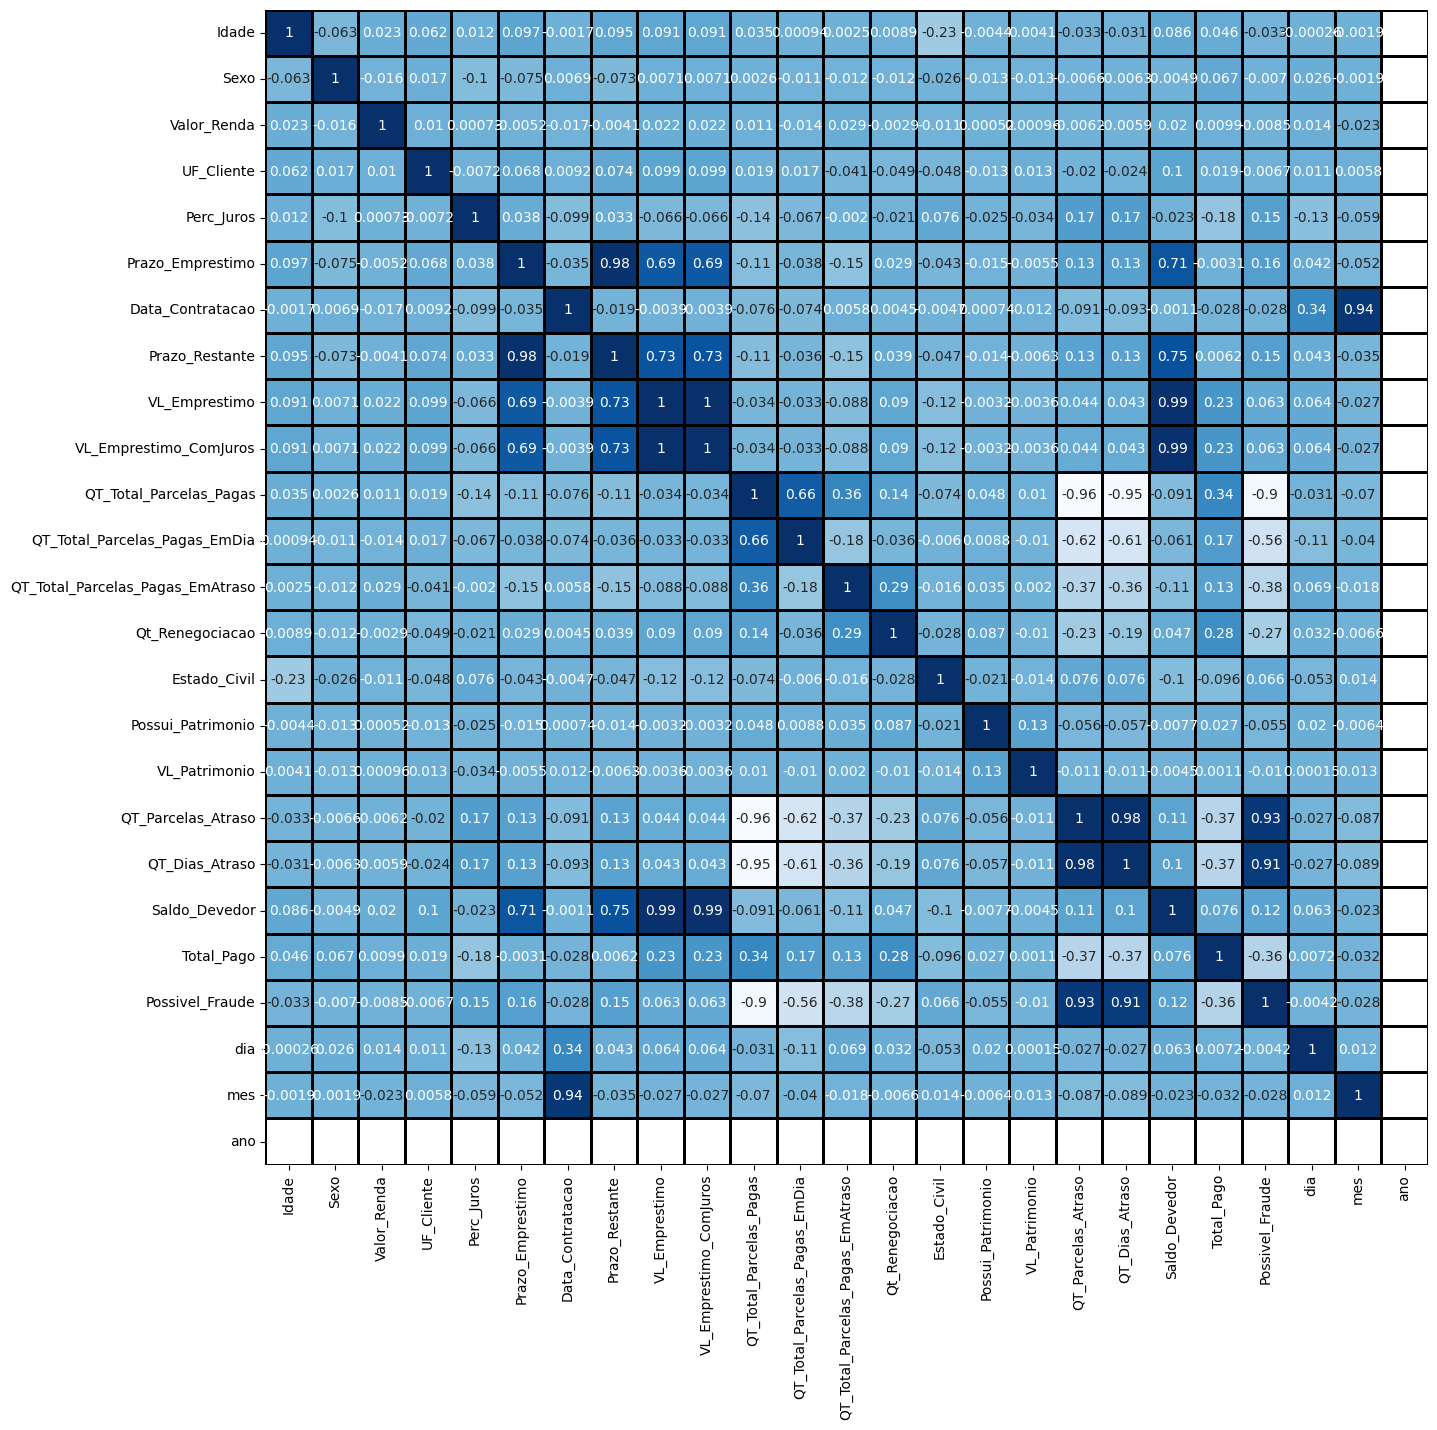

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, cmap='Blues', linewidths=1, linecolor='black', cbar=False)
plt.show()

In [37]:
X = df.drop(['Possivel_Fraude',"Data_Contratacao","ano"], axis=1)
y = df['Possivel_Fraude']

In [38]:
df.columns

Index(['Idade', 'Sexo', 'Valor_Renda', 'UF_Cliente', 'Perc_Juros',
       'Prazo_Emprestimo', 'Data_Contratacao', 'Prazo_Restante',
       'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso',
       'Qt_Renegociacao', 'Estado_Civil', 'Possui_Patrimonio', 'VL_Patrimonio',
       'QT_Parcelas_Atraso', 'QT_Dias_Atraso', 'Saldo_Devedor', 'Total_Pago',
       'Possivel_Fraude', 'dia', 'mes', 'ano'],
      dtype='object')

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state=42)

In [40]:
X_train.head()

,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,dia,mes
2208,25,0,2500.00,9,20.00,200,193,120000.00,138000.00,5,0,2,3,3,0,0.00,10,315,143327.48,2261.08,23,8
3540,53,0,4500.00,13,22.00,80,91,30000.00,34500.00,7,7,0,1,3,0,0.00,6,162,35087.10,1959.65,3,9
8465,42,0,4800.00,13,19.00,190,185,100000.00,115000.00,4,1,1,1,0,0,0.00,9,251,118847.10,1553.84,21,10
3469,65,0,1860.00,25,20.00,200,193,100000.00,115000.00,13,2,11,2,5,0,0.00,1,11,116443.52,4961.40,2,9
8440,57,0,3000.00,10,24.00,36,23,5000.00,5750.00,9,0,7,2,1,0,0.00,0,0,4038.39,2397.74,21,10


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
model_tree = RandomForestClassifier(n_estimators=100)
model_tree.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
print(classification_report(y_test, model_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1502
           1       0.99      0.99      0.99      1354

    accuracy                           0.99      2856
   macro avg       0.99      0.99      0.99      2856
weighted avg       0.99      0.99      0.99      2856



In [44]:
pd.crosstab(y_test, model_tree.predict(X_test)).style.background_gradient(cmap='Blues')

col_0,0,1
Possivel_Fraude,,
0,1483,19
1,7,1347


<Axes: ylabel='None'>

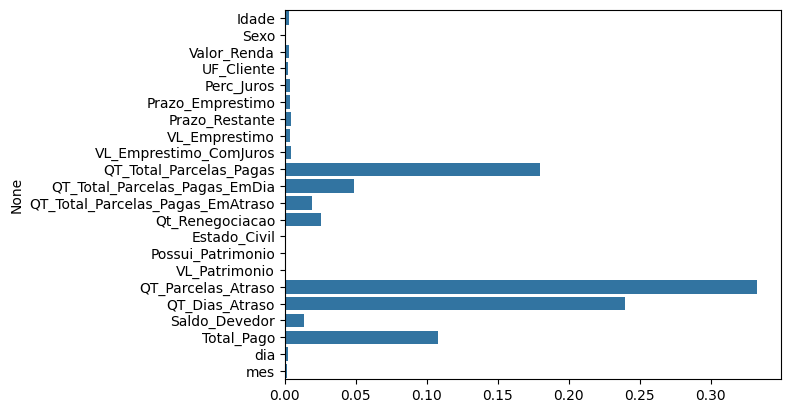

In [45]:
sns.barplot(x=model_tree.feature_importances_, y=X_train.columns)


In [46]:
X_teste = X.drop(["Sexo",'mes','VL_Patrimonio',"Estado_Civil","Possui_Patrimonio"],axis=1)

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X_teste,y,test_size=.3, random_state=42)

In [48]:
model_tree = RandomForestClassifier(n_estimators=100, random_state=42)
model_tree.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
print(classification_report(y_test, model_tree.predict(X_test)))
print(confusion_matrix(y_test, model_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1502
           1       0.99      0.99      0.99      1354

    accuracy                           0.99      2856
   macro avg       0.99      0.99      0.99      2856
weighted avg       0.99      0.99      0.99      2856

[[1488   14]
 [   9 1345]]
